In [34]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
# from tqdm import tqdm
import tqdm.notebook as tqdm

# managing files
from glob import glob
from shutil import copyfile
import pickle as pkl

# tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, Conv2D, MaxPool2D, ZeroPadding2D, BatchNormalization, Input, DepthwiseConv2D, Add, LeakyReLU, ReLU
from tensorflow.keras.optimizers import Adam, SGD

# Audio
import librosa
import librosa.display as dsp
import IPython.display as ipd

# Augmentation
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift

# Model
from architecture.autoencoder import autoencoder_fc, Denoise

In [50]:
pkl_path = "./data/features/classes/train_sr_16e3_bearing_crop4_featuremfccADD_label.pkl"
with open(pkl_path, 'rb') as f: raw_data = pkl.load(f)

len(raw_data)

990

In [51]:
train_data = [np.resize(i[0], (128, 128)) for i in raw_data]
train_data = tf.expand_dims(train_data, -1)

train_label = [i[-1] for i in raw_data]

(128, 128, 1)


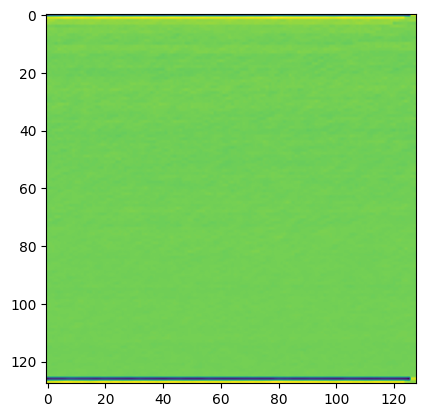

In [52]:
print(np.shape(train_data[0]))
plt.imshow(train_data[0])

In [53]:
# Define Augmentation
augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5),
    PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
])

In [54]:
print(np.max(train_label), np.min(train_label))

0 0


In [55]:
BATCH_SIZE = 256
SHUFFLE_BUFFER_SIZE = 128
AUTOTUNE = tf.data.AUTOTUNE

train_ds = tf.data.Dataset.from_tensor_slices((train_data, train_label))
train_ds = train_ds.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

In [56]:
# model = Denoise()
model = autoencoder_fc()
# model.summary()

In [57]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [58]:
history = model.fit(
    train_ds, 
    epochs=10
)

Epoch 1/10
4/4 [==============================] - 2s 20ms/step - loss: 0.2271 - accuracy: 0.7414
Epoch 2/10
4/4 [==============================] - 0s 20ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/10
4/4 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
4/4 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
4/4 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
4/4 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - accuracy: 

In [59]:
inf_path = glob("./data/features/classes/test*")
inf_path

# inf_data = []
# for i in tqdm(inf_path):
#     inf_data.append(path_to_mel(i, False))

['./data/features/classes/test_sr_16e3_valve_crop4_featuremfcc.pkl',
 './data/features/classes/test_sr_16e3_gearbox_crop4_featuremfcc.pkl',
 './data/features/classes/test_sr_16e3_slider_crop4_featuremfcc.pkl',
 './data/features/classes/test_sr_16e3_ToyCar_crop4_featuremfcc.pkl',
 './data/features/classes/test_sr_16e3_ToyTrain_crop4_featuremfcc.pkl',
 './data/features/classes/test_sr_16e3_bearing_crop4_featuremfcc.pkl',
 './data/features/classes/test_sr_16e3_fan_crop4_featuremfcc.pkl']

In [63]:
value = [1, 2, 3]
print(['even' for i in value if value % 2 == 0 else 'odd'])

SyntaxError: invalid syntax (1896542611.py, line 2)

In [49]:
# Load test data
with open(inf_path[0], 'rb') as f: inf_data_pkl = pkl.load(f)
inf_data_pkl[0]

[array([[-3.6246249e+02, -3.2798950e+02, -3.1921429e+02, ...,
         -3.2270230e+02, -3.2240338e+02, -3.2588766e+02],
        [ 1.0271651e+02,  1.0843271e+02,  1.0462500e+02, ...,
          1.0655036e+02,  1.0577085e+02,  1.0478076e+02],
        [ 1.7972088e+01,  1.4839329e+01,  9.8827000e+00, ...,
          1.5222961e+01,  1.4446847e+01,  1.6943653e+01],
        ...,
        [-2.4844341e+00, -9.6939087e-01, -1.4747238e-01, ...,
         -7.2693443e-01, -7.8687477e-01, -6.1339951e-01],
        [ 3.5675335e-01,  7.0948362e-01, -9.9875450e-02, ...,
         -1.5301166e+00,  6.8059921e-02,  2.1554947e-01],
        [ 2.9973564e+00,  1.2214470e+00, -1.6169357e-01, ...,
          5.2744293e-01, -8.8188934e-01, -3.1936188e+00]], dtype=float32),
 4,
 0]

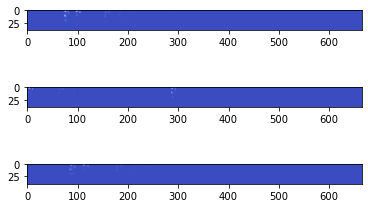

In [86]:
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib import cm

# plt.subplot(3, 1, 1)
# plt.imshow(data[1], cmap=cm.coolwarm)
# plt.subplot(3, 1, 2)
# plt.imshow(data[2], cmap=cm.coolwarm)
# plt.subplot(3, 1, 3)
# plt.imshow(data[3], cmap=cm.coolwarm)

# plt.show()

In [119]:
inf_data_reshaped = []

for i in tqdm(inf_data):
    inf_data_reshaped.append(i.reshape(-1, 40, 665, 1))

100%|██████████| 5732/5732 [00:00<00:00, 1364458.03it/s]


In [35]:
# Model 추론
inf_result = []

for i in tqdm(inf_data_reshaped):
    preds = model.predict(i)
    score = tf.nn.softmax(preds[0])
    class_names = [0,1]
    print('Answer is : ', class_names[np.argmax(score)])
    inf_result.append(class_names[np.argmax(score)])

NameError: name 'inf_data_reshaped' is not defined

In [132]:
print(test_csv.loc[1][3] == 0, test_csv.loc[1][4] == 0)

True True


In [133]:
tmp = inf_result
for i in range(len(tmp)):
    if test_csv.loc[i][3] == 0 and test_csv.loc[i][4] == 0:
        print('trig')
        tmp[i] = 0
    else:
        continue

trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig
trig


In [138]:
np.max(tmp)

1

In [137]:
submission = pd.read_csv('data/sample_submission.csv')
submission = submission.drop('covid19', 1)
submission['covid19'] = tmp
submission.to_csv('3layerCnn_fullData_augmentation_00drop.csv', index=False)

/var/folders/8k/pkmq0wfd32q_r2nr5rcf2x1m0000gn/T/ipykernel_52724/604763204.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  submission = submission.drop('covid19', 1)
